In [ ]:
!pip install -q efficientnet >> /dev/null

In [ ]:
import os, glob, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import get_custom_objects
import efficientnet.tfkeras as efn
from tqdm import tqdm

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving NL_001.png to NL_001.png


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
SEED = 42
EPOCHS = 100
BATCH_SIZE = 32
IMG_HEIGHT = 192
IMG_WIDTH = 256

In [ ]:
#import glob
#images = glob.glob('...\dataset\1_normal' + '/*.jpg')

In [ ]:
IMG_ROOT = '../input/cataractdataset/dataset/'
IMG_DIR = [IMG_ROOT+'1_normal', 
           IMG_ROOT+'2_cataract']

In [ ]:
def seed_everything(seed):
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    tf.random.set_seed(seed)

seed_everything(SEED)

In [ ]:
import os
from os import listdir
 
# get the path/directory
folder_dir = "C:/Users/Hetal Atwal/Google Drive/dataset/1_normal"
#"C:\Users\Hetal Atwal\Google Drive\dataset\1_normal"
for images in os.listdir(folder_dir):
 
    # check if the image ends with png
    if (images.endswith(".png")):
        print(images)

In [ ]:
cat_df = pd.DataFrame(0, columns=['paths','cataract'], index=range(601))
#filepaths = glob.glob(IMG_ROOT + '*/*')

for i, filepath in enumerate(images):
    filepath = os.path.split(filepath)
    #print(filepath)
    cat_df.iloc[i, 0] = filepath[0] + '/' + filepath[1]
    if filepath[0] == IMG_DIR[0]:    # normal
        cat_df.iloc[i, 1] = 0
    elif filepath[0] == IMG_DIR[1]:  # cataract
        cat_df.iloc[i, 1] = 1

In [ ]:
cat_df = cat_df.query('0 <= cataract < 2')
cat_df['paths']

0      0
1      0
2      0
3      0
4      0
      ..
596    0
597    0
598    0
599    0
600    0
Name: paths, Length: 601, dtype: int64

In [ ]:
print('Number of normal and cataract images')
print(cat_df['cataract'].value_counts())

Number of normal and cataract images
0    401
Name: cataract, dtype: int64


In [ ]:
import keras
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops

In [ ]:
def show_image(img, cmap='gray'):
    fig = plt.figure(figsize=(20,20))
    axes = fig.add_subplot(111)
    axes.imshow(img, cmap=cmap)

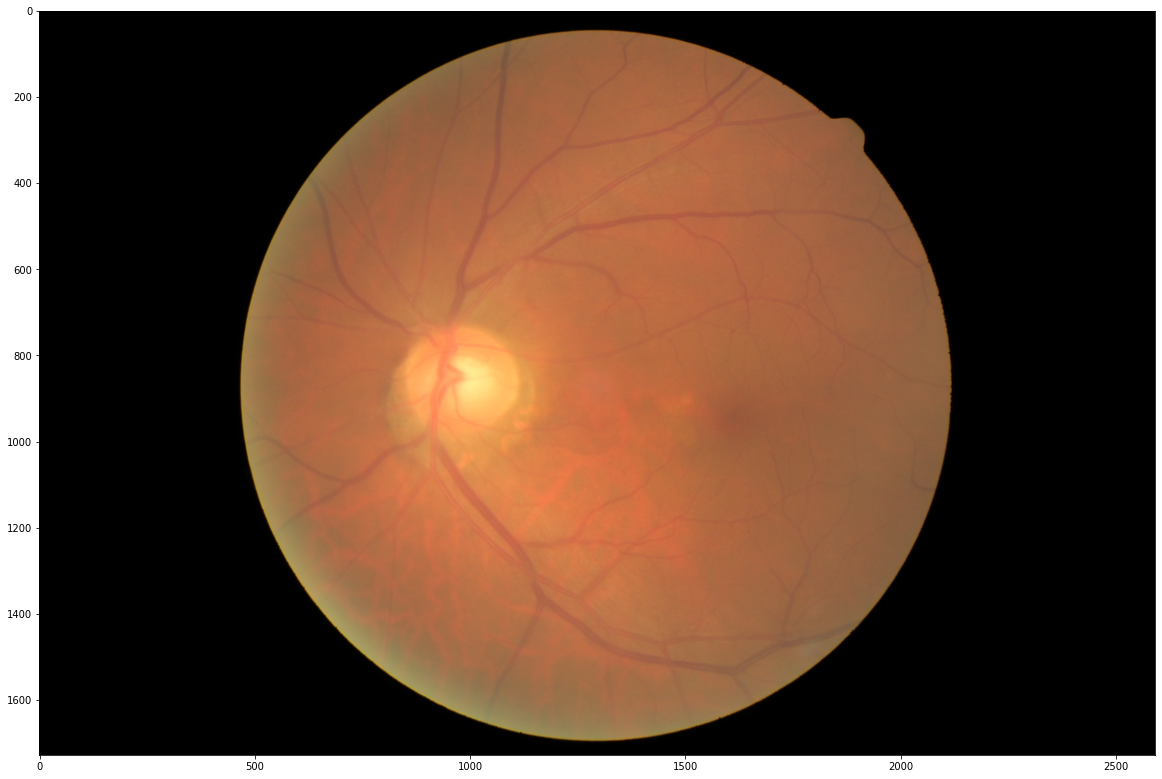

In [ ]:
cat_img = cv.imread("/content/drive/MyDrive/dataset/2_cataract/cataract_001.png")
cat_img = cv.cvtColor(cat_img, cv.COLOR_BGR2RGB)
show_image(cat_img)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/kaggle/input/preprocessed_images/4412_right.jpg
/content/drive/MyDrive/kaggle/input/preprocessed_images/4450_left.jpg
/content/drive/MyDrive/kaggle/input/preprocessed_images/42_left.jpg
/content/drive/MyDrive/kaggle/input/preprocessed_images/4334_right.jpg
/content/drive/MyDrive/kaggle/input/preprocessed_images/4393_right.jpg
/content/drive/MyDrive/kaggle/input/preprocessed_images/4367_left.jpg
/content/drive/MyDrive/kaggle/input/preprocessed_images/433_left.jpg
/content/drive/MyDrive/kaggle/input/preprocessed_images/4395_right.jpg
/content/drive/MyDrive/kaggle/input/preprocessed_images/4397_right.jpg
/content/drive/MyDrive/kaggle/input/preprocessed_images/4356_left.jpg
/content/drive/MyDrive/kaggle/input/preprocessed_images/4406_right.jpg
/content/drive/MyDrive/kaggle/input/preprocessed_images/42_right.jpg
/content/drive/MyDrive/kaggle/input/preprocessed_images/4389_right.jpg
/content/drive/MyDrive/kaggle/input/

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/kaggle/input/full_df.csv")
df.head(3)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg


In [ ]:
def has_cataract(text):
    if "cataract" in text:
        return 1
    else:
        return 0

In [ ]:
df["left_cataract"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
df["right_cataract"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_cataract(x))

In [ ]:
df.head(3)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,A,H,M,O,filepath,labels,target,filename,left_cataract,right_cataract
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,1,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,0,0


In [ ]:
left_cataract = df.loc[(df.C ==1) & (df.left_cataract == 1)]["Left-Fundus"].values
left_cataract[:15]

array(['0_left.jpg', '81_left.jpg', '103_left.jpg', '119_left.jpg',
       '254_left.jpg', '294_left.jpg', '330_left.jpg', '448_left.jpg',
       '465_left.jpg', '477_left.jpg', '553_left.jpg', '560_left.jpg',
       '594_left.jpg', '611_left.jpg', '625_left.jpg'], dtype=object)

In [ ]:
right_cataract = df.loc[(df.C ==1) & (df.right_cataract == 1)]["Right-Fundus"].values
right_cataract[:15]

array(['24_right.jpg', '81_right.jpg', '112_right.jpg', '188_right.jpg',
       '218_right.jpg', '345_right.jpg', '354_right.jpg', '477_right.jpg',
       '553_right.jpg', '560_right.jpg', '625_right.jpg', '726_right.jpg',
       '769_right.jpg', '949_right.jpg', '955_right.jpg'], dtype=object)

In [ ]:
print("Number of images in left cataract: {}".format(len(left_cataract)))
print("Number of images in right cataract: {}".format(len(right_cataract)))

Number of images in left cataract: 304
Number of images in right cataract: 290


In [ ]:
left_normal = df.loc[(df.C ==0) & (df["Left-Diagnostic Keywords"] == "normal fundus")]["Left-Fundus"].sample(250,random_state=42).values
right_normal = df.loc[(df.C ==0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]["Right-Fundus"].sample(250,random_state=42).values
right_normal[:15]

array(['2964_right.jpg', '680_right.jpg', '500_right.jpg',
       '2368_right.jpg', '2820_right.jpg', '2769_right.jpg',
       '2696_right.jpg', '2890_right.jpg', '940_right.jpg',
       '2553_right.jpg', '3371_right.jpg', '3042_right.jpg',
       '919_right.jpg', '3427_right.jpg', '379_right.jpg'], dtype=object)

In [ ]:
cataract = np.concatenate((left_cataract,right_cataract),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)

In [ ]:
print(len(cataract),len(normal))

594 500


In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
dataset_dir = "/content/drive/MyDrive/kaggle/input/preprocessed_images"
image_size=224
labels = []
dataset = []
def create_dataset(image_category,label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue
        
        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset

In [ ]:
dataset = create_dataset(cataract,1)

100%|██████████| 594/594 [01:33<00:00,  6.39it/s] 


In [ ]:
len(dataset)

588

In [ ]:
dataset = create_dataset(normal,0)

100%|██████████| 500/500 [00:03<00:00, 151.95it/s]


In [ ]:
len(dataset)

1088

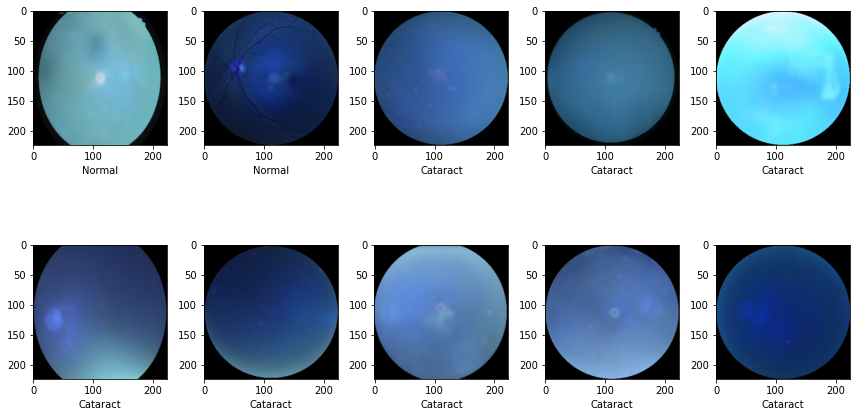

In [ ]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout()  

In [ ]:
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = True

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 20,049,473
Trainable params: 20,049,473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg19.h5",monitor="val_acc",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)
earlystop = EarlyStopping(monitor="val_acc",patience=5,verbose=1)

In [ ]:
history = model.fit(x_train,y_train,batch_size=32,epochs=15,validation_data=(x_test,y_test),
                    verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/15
28/28 [==============================] - ETA: 0s - loss: 51.3092 - accuracy: 0.4943

28/28 [==============================] - 34s 679ms/step - loss: 51.3092 - accuracy: 0.4943 - val_loss: 0.7032 - val_accuracy: 0.5229
Epoch 2/15
28/28 [==============================] - ETA: 0s - loss: 0.7219 - accuracy: 0.5414

28/28 [==============================] - 14s 510ms/step - loss: 0.7219 - accuracy: 0.5414 - val_loss: 0.7123 - val_accuracy: 0.4404
Epoch 3/15
28/28 [==============================] - ETA: 0s - loss: 0.7014 - accuracy: 0.5598

28/28 [==============================] - 14s 519ms/step - loss: 0.7014 - accuracy: 0.5598 - val_loss: 0.6498 - val_accuracy: 0.5780
Epoch 4/15
28/28 [==============================] - ETA: 0s - loss: 0.6703 - accuracy: 0.5920

28/28 [==============================] - 15s 537ms/step - loss: 0.6703 - accuracy: 0.5920 - val_loss: 0.6407 - val_accuracy: 0.5780
Epoch 5/15
28/28 [==============================] - ETA: 0s - loss: 0.6289 - accuracy: 0.6483

28/28 [==============================] - 15s 543ms/step - loss: 0.6289 - accuracy: 0.6483 - val_loss: 0.6207 - val_accuracy: 0.6055
Epoch 6/15
28/28 [==============================] - ETA: 0s - loss: 0.6464 - accuracy: 0.6138

28/28 [==============================] - 15s 532ms/step - loss: 0.6464 - accuracy: 0.6138 - val_loss: 0.6154 - val_accuracy: 0.7202
Epoch 7/15
28/28 [==============================] - ETA: 0s - loss: 0.6215 - accuracy: 0.6644

28/28 [==============================] - 15s 522ms/step - loss: 0.6215 - accuracy: 0.6644 - val_loss: 0.6195 - val_accuracy: 0.6330
Epoch 8/15
28/28 [==============================] - ETA: 0s - loss: 0.5981 - accuracy: 0.6816

28/28 [==============================] - 15s 523ms/step - loss: 0.5981 - accuracy: 0.6816 - val_loss: 0.5892 - val_accuracy: 0.7156
Epoch 9/15
28/28 [==============================] - ETA: 0s - loss: 0.5424 - accuracy: 0.7345

28/28 [==============================] - 15s 530ms/step - loss: 0.5424 - accuracy: 0.7345 - val_loss: 0.5692 - val_accuracy: 0.7156
Epoch 10/15
28/28 [==============================] - ETA: 0s - loss: 0.5256 - accuracy: 0.7460

28/28 [==============================] - 15s 534ms/step - loss: 0.5256 - accuracy: 0.7460 - val_loss: 0.6009 - val_accuracy: 0.6651
Epoch 11/15
28/28 [==============================] - ETA: 0s - loss: 0.5333 - accuracy: 0.7264

28/28 [==============================] - 15s 533ms/step - loss: 0.5333 - accuracy: 0.7264 - val_loss: 0.5146 - val_accuracy: 0.7569
Epoch 12/15
28/28 [==============================] - ETA: 0s - loss: 0.4774 - accuracy: 0.7931

28/28 [==============================] - 15s 530ms/step - loss: 0.4774 - accuracy: 0.7931 - val_loss: 0.4364 - val_accuracy: 0.8119
Epoch 13/15
28/28 [==============================] - ETA: 0s - loss: 0.4529 - accuracy: 0.7816

28/28 [==============================] - 15s 529ms/step - loss: 0.4529 - accuracy: 0.7816 - val_loss: 0.5577 - val_accuracy: 0.7798
Epoch 14/15
28/28 [==============================] - ETA: 0s - loss: 0.3895 - accuracy: 0.8322

28/28 [==============================] - 15s 530ms/step - loss: 0.3895 - accuracy: 0.8322 - val_loss: 0.3694 - val_accuracy: 0.8624
Epoch 15/15
28/28 [==============================] - ETA: 0s - loss: 0.4329 - accuracy: 0.8460

28/28 [==============================] - 15s 532ms/step - loss: 0.4329 - accuracy: 0.8460 - val_loss: 0.3047 - val_accuracy: 0.8761


In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

7/7 [==============================] - 1s 173ms/step - loss: 0.3047 - accuracy: 0.8761
loss: 0.3046543300151825
Accuracy: 0.8761467933654785


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = (model.predict(x_test) > 0.5).astype("int32")
print(y_pred)

7/7 [==============================] - 1s 178ms/step
[[1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [

In [ ]:
accuracy_score(y_test,y_pred)

0.8761467889908257

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84        93
           1       0.84      0.97      0.90       125

    accuracy                           0.88       218
   macro avg       0.89      0.86      0.87       218
weighted avg       0.89      0.88      0.87       218



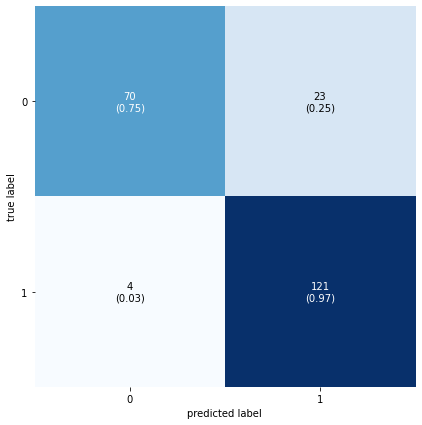

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
labels = ["Normal","Cataract"]
plot_confusion_matrix( cm,labels,show_normed = True,figsize=(8,7));

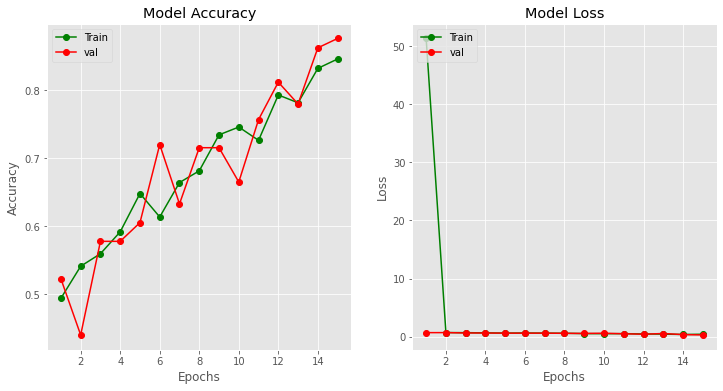

In [ ]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-")
plt.plot(epochs,history.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

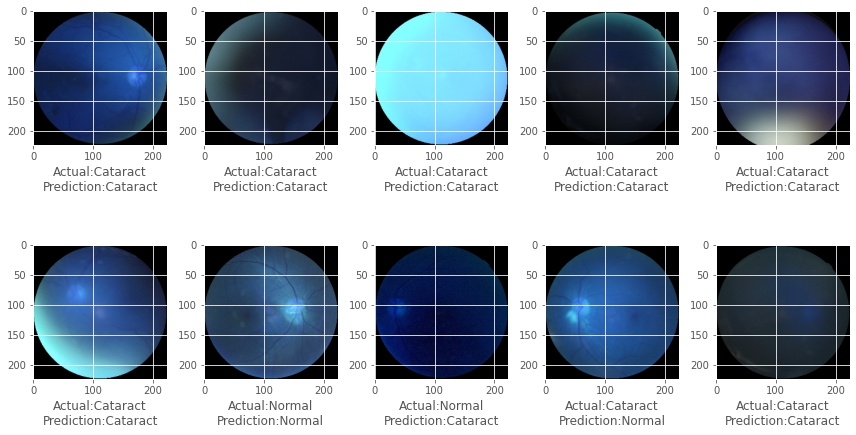

In [ ]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred[sample]
    
    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"
        
    if pred_category== 0:
        pred_label = "Normal"
    else:
        pred_label = "Cataract"
        
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout() 